## Data Petri Net - Example for Explainable Representations

The used p2p base event log has the following implemented decision points with guards:
- Request Manager or Standard Approval:
    - Request Manager Approval if total_price >= 800
    - Request Standard Approval if total_price <= 1000
- Manager Rejection or Approval:
    - Manager Rejection if total_price >= 500 and random_exponential(100, 200) > 120
    - No Guard for Manager Approval 
- Standard Rejection or Approval:
    - Standard Rejection if total_price >= 500 and random_exponential(100, 200) > 120
    - No Guard for Standard Approval 

In [1]:
import os
from exdpn.util import import_log
from exdpn.data_petri_net import data_petri_net
from exdpn.guards import ML_Technique

#### First, create a Data Petri Net.

In [2]:
event_log_base = import_log(os.path.join(os.getcwd(), "..", 'datasets', 'p2p_base.xes'))
dpn_base = data_petri_net.Data_Petri_Net(event_log = event_log_base, 
                                                  event_level_attributes = ['item_category','item_id','item_amount','supplier','total_price'],
                                                  verbose = False)

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


#### Closer look at one of the decision points.

In [3]:
decision_point = list(dpn_base.decision_points)[0]
decision_point 

({'create purchase order'}, {'request manager approval', 'request standard approval'})

#### Compare Performances of all machine learning techniques. 

Best guard: <exdpn.guards.neural_network_guard.Neural_Network_Guard object at 0x000001C03990A800>


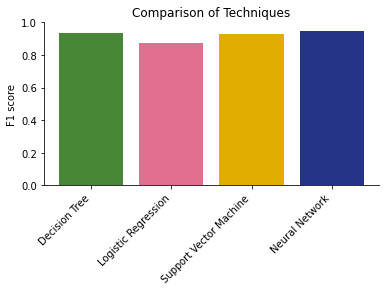

In [4]:
dpn_base.guard_manager_per_place[decision_point].get_comparison_plot()
print("Best guard:", dpn_base.get_guard_at_place(decision_point))

#### Now get explainable representations of all machine learing guards at that decision point.

Decision Tree


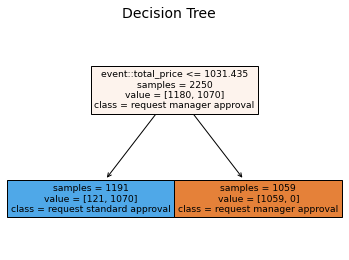

In [5]:
dt_guard = dpn_base.guard_manager_per_place[decision_point].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    print("Decision Tree")
    dt_guard.get_explainable_representation()

Support Vector Machine


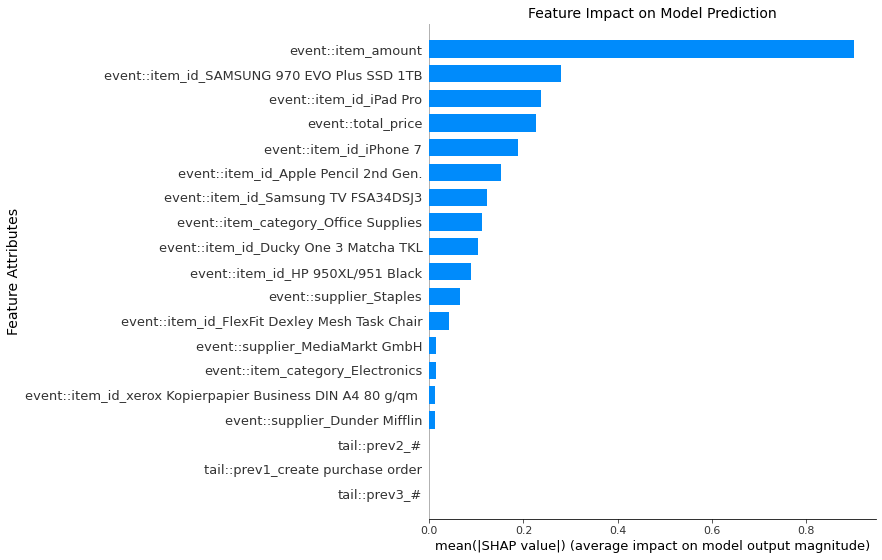

In [6]:
svm_guard = dpn_base.guard_manager_per_place[decision_point].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    print("Support Vector Machine")
    svm_guard.get_explainable_representation(dpn_base.guard_manager_per_place[decision_point].X_test)

Neural Network


  0%|          | 0/100 [00:00<?, ?it/s]

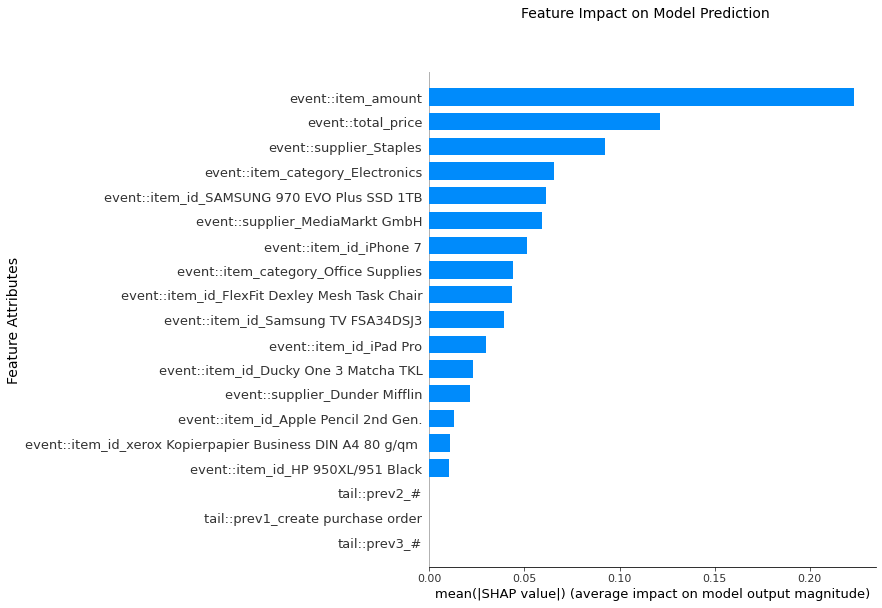

In [8]:
nn_guard = dpn_base.guard_manager_per_place[decision_point].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    print("Neural Network")
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_base.guard_manager_per_place[decision_point].X_test.sample(n = min(100, len(dpn_base.guard_manager_per_place[decision_point].X_test)))
    nn_guard.get_explainable_representation(sampled_test_data)

Decision Tree


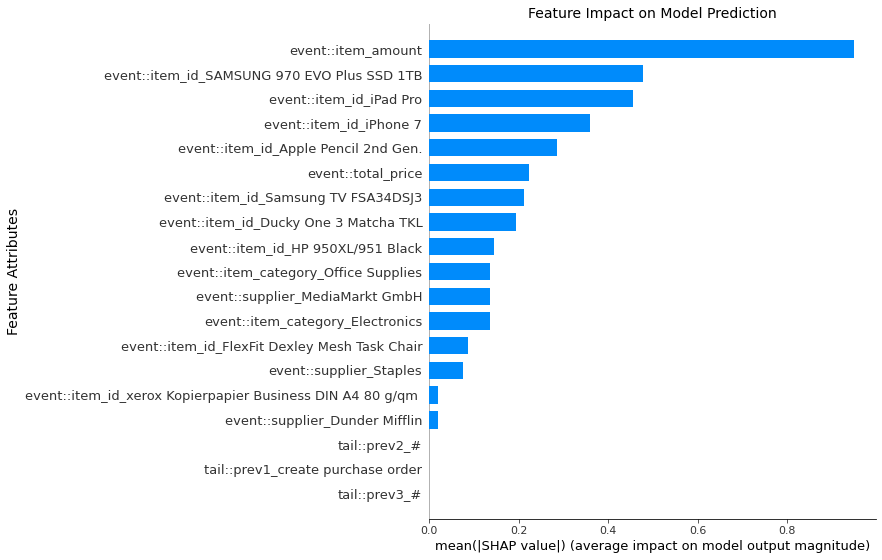

In [9]:
lr_guard = dpn_base.guard_manager_per_place[decision_point].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    print("Logistic Regression")
    lr_guard.get_explainable_representation(dpn_base.guard_manager_per_place[decision_point].X_test)